# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. #should be correct
combined_df["Mouse ID"].unique().size


249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. #array(['g989'], dtype=object)



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen #Completed!!

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = combined_df["Tumor Volume (mm3)"].groupby(combined_df["Drug Regimen"]).mean()
drug_median = combined_df["Tumor Volume (mm3)"].groupby(combined_df["Drug Regimen"]).median()
drug_var = combined_df["Tumor Volume (mm3)"].groupby(combined_df["Drug Regimen"]).var()
drug_std = combined_df["Tumor Volume (mm3)"].groupby(combined_df["Drug Regimen"]).std()
drug_sem = combined_df["Tumor Volume (mm3)"].groupby(combined_df["Drug Regimen"]).sem()

drug_reg_counts = combined_df["Mouse ID"].groupby(combined_df["Drug Regimen"]).count()

sumstats_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                            "Median Tumor Volume":drug_median,
                            "Tumor Volume Variance":drug_var,
                            "Tumor Volume Std. Dev":drug_std,
                            "Tumor Volume Std. Err.":drug_sem})
sumstats_df


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, #not sure what they mean by this
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_sumstats = pd.DataFrame

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

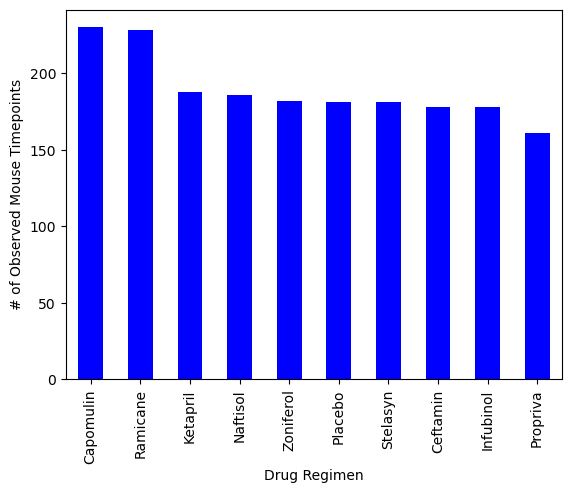

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. #Change Color
drug_reg_counts = drug_reg_counts.sort_values(ascending=False)
drug_reg_counts.plot(kind="bar", x="x_axis", y="mouse_num",
          facecolor="blue",
           xlabel="Drug Regimen",
             ylabel="# of Observed Mouse Timepoints")

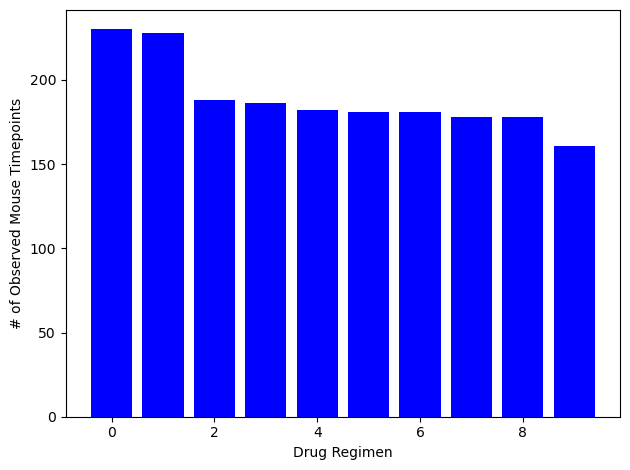

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot. #Figure how to label the x_axis
x_axis = np.arange(len(drug_reg_counts))
mouse_nums = drug_reg_counts

plt.bar(x_axis, mouse_nums, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#tick_locations = [value for value in x_axis]
#lt.xticks(tick_locations,drug_reg_counts.unique())

plt.tight_layout()
plt.show()


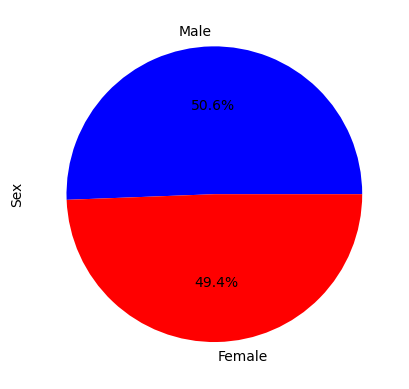

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas #Adjust Colors 
#male_female = combined_df["Sex"].unique()
mf_counts = combined_df["Sex"].value_counts()
pie = mf_counts
colors= ["blue", "red"]
male_vs_female = mf_counts.plot(kind="pie", y="Sex", colors=colors, autopct="%1.1f%%")
male_vs_female.set_ylabel("Sex")

plt.show()


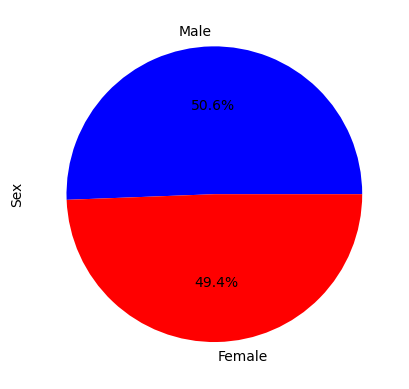

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_df["Sex"].unique()
counts = mf_counts 
colors= ["blue", "red"]
plt.pie(counts, labels=gender, colors=colors, autopct="%1.1f%%",)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_results_df = combined_df.loc[(combined_df["Timepoint"] == 45)]
final_results_df = final_results_df.loc[(final_results_df["Drug Regimen"] == "Capomulin")|
                                   (final_results_df["Drug Regimen"] == "Ramicane")|
                                   (final_results_df["Drug Regimen"] == "Infubinol")|
                                   (final_results_df["Drug Regimen"] == "Ceftamin")]
final_results_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint #Not sure what they mean....


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


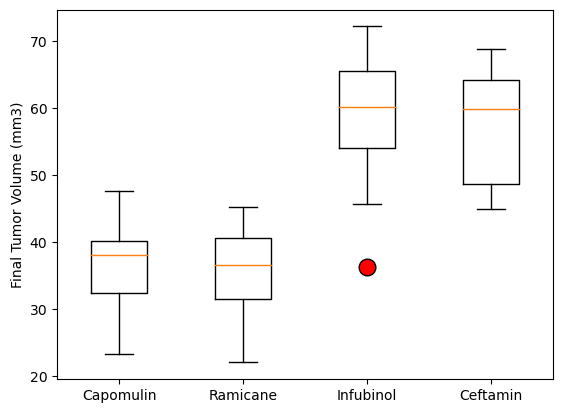

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(arr, showmeans=True)
plt.show()

## Line and Scatter Plots

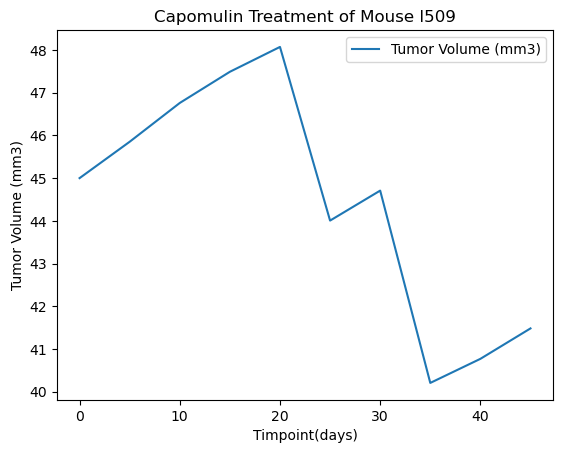

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin #Mouse L509

#Created new dataframe of mouse l509 of the Tumor Volume and Timpoint columns
mouse_l509 = combined_df.loc[(combined_df["Mouse ID"]) == "l509"]
mouse_l509 = mouse_l509[["Timepoint", "Tumor Volume (mm3)"]]

mouse_l509.plot(x="Timepoint", y="Tumor Volume (mm3)", xlabel="Timpoint(days)", ylabel="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse l509")
plt.show()



/var/folders/w9/k4xhwbsx2f3cdrnn0qftk1x00000gn/T/ipykernel_15850/3808745959.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()


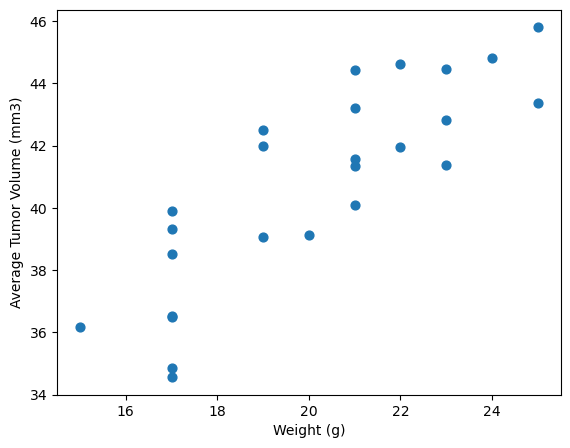

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen #Correct

#Grabbing all the mice on the drug Capomulin

capomulin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin")]

#Scatter plot by average observed tumor volume
tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()
tumor_mean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40,
                 figsize=(6.5,5), xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

/var/folders/w9/k4xhwbsx2f3cdrnn0qftk1x00000gn/T/ipykernel_15850/1504273556.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()


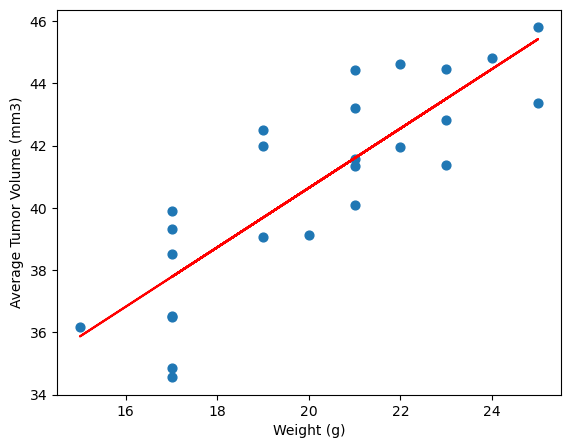

In [98]:
# Calculate the correlation coefficient and a linear regression model #Correct!
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin")]
tumor_mean = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()

#Linear Regression
#x_value = tumor_mean["Weight (g)"]
#y_value = 

(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_mean["Weight (g)"], tumor_mean["Tumor Volume (mm3)"])
regress_values = tumor_mean["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tumor_mean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40,
                 figsize=(6.5,5), xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")
plt.plot(tumor_mean["Weight (g)"],regress_values,"r-")

